In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder



In [96]:
df = pd.read_csv('https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/ProdTime.csv')
df.head()

,day,PRODTIME,MONEY,MAIL,WINDOW,CHANGE,CHECKS,MISC,BUS
0,M,128.5,7781,100,886,235,644,56,737
1,T,113.6,7004,110,962,388,589,57,1029
2,W,146.6,7267,61,1342,398,1081,59,830
3,Th,124.3,2129,102,1153,457,891,57,1468
4,F,100.4,4878,45,803,577,537,49,335


In [182]:
#inspecting data and dropping null values
#print(df.describe())
df.dropna()
print(df.isnull().sum(),df.count)


day            0
PRODTIME       0
MONEY          0
MAIL           0
WINDOW         0
CHANGE         0
CHECKS         0
MISC           0
BUS            0
day encoded    0
dtype: int64 <bound method DataFrame.count of    day  PRODTIME  MONEY  MAIL  WINDOW  CHANGE  CHECKS  MISC   BUS  day encoded
0    M     128.5   7781   100     886     235     644    56   737            0
1    T     113.6   7004   110     962     388     589    57  1029            1
2    W     146.6   7267    61    1342     398    1081    59   830            2
3   Th     124.3   2129   102    1153     457     891    57  1468            3
4    F     100.4   4878    45     803     577     537    49   335            4
5    S     119.2   3999   144    1127     345     563    64   918            5
6    M     109.5  11777   123     627     326     402    60   335            0
7    T     128.5   5764    78     748     161     495    57   962            1
8    W     131.2   7392   172     876     219     823    62   665        

In [7]:
df.head()

,day,PRODTIME,MONEY,MAIL,WINDOW,CHANGE,CHECKS,MISC,BUS
0,M,128.5,7781,100,886,235,644,56,737
1,T,113.6,7004,110,962,388,589,57,1029
2,W,146.6,7267,61,1342,398,1081,59,830
3,Th,124.3,2129,102,1153,457,891,57,1468
4,F,100.4,4878,45,803,577,537,49,335


<bound method NDFrame.head of    day  PRODTIME  MONEY  MAIL  WINDOW  CHANGE  CHECKS  MISC   BUS  day encoded
0    M     128.5   7781   100     886     235     644    56   737            0
1    T     113.6   7004   110     962     388     589    57  1029            1
2    W     146.6   7267    61    1342     398    1081    59   830            2
3   Th     124.3   2129   102    1153     457     891    57  1468            3
4    F     100.4   4878    45     803     577     537    49   335            4
5    S     119.2   3999   144    1127     345     563    64   918            5
6    M     109.5  11777   123     627     326     402    60   335            0
7    T     128.5   5764    78     748     161     495    57   962            1
8    W     131.2   7392   172     876     219     823    62   665            2
9   Th     112.2   8100   126     685     287     555    86   577            3
10   F      95.4   4736   115     436     235     456    38   214            4
11   S     124.6   433

<Axes: >

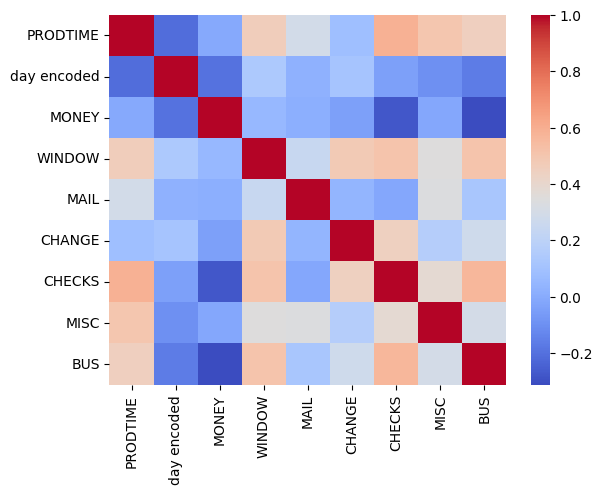

In [98]:
df['day encoded'] = pd.factorize(df['day'])[0]
print(df.head)
heatmapdf = df[['PRODTIME','day encoded','MONEY','WINDOW','MAIL','CHANGE','CHECKS','MISC','BUS']]
corr_hmap = heatmapdf.corr()
sns.heatmap(corr_hmap,cmap='coolwarm',fmt=".2F")
    



In [286]:
df_xvarOG = df[['MONEY','WINDOW','MAIL','CHANGE','CHECKS','MISC','BUS']]
vifdata2 = pd.DataFrame()
vifdata2['predictors'] = df_xvarOG.columns
vifdata2['VIF'] = [variance_inflation_factor(df_xvarOG.values, i)
                          for i in range(len(df_xvarOG.columns))]
print(vifdata2)

  predictors        VIF
0      MONEY   8.306341
1     WINDOW  24.133885
2       MAIL   8.949578
3     CHANGE   7.210834
4     CHECKS  21.091205
5       MISC  23.536819
6        BUS   9.170516


In [280]:
#here is our predictors dataframe we will drop variables that muddy up the model and dont have significant correlation.
df_xvarOG = df[['MONEY','WINDOW','MAIL','CHANGE','CHECKS','MISC','BUS']]
df_xvar = df[['CHANGE','CHECKS','BUS']]
df_xvar['misc+mail'] = df['MISC']+df['MAIL']
df_xvar['WINDOWS+MONEY'] = df['WINDOW']+df['MONEY']
#df_xvar['CHECKS + BUS'] = df['CHECKS']+df['BUS']
vifdata = pd.DataFrame()
vifdata['predictors'] = df_xvar.columns
vifdata['VIF'] = [variance_inflation_factor(df_xvar.values, i)
                          for i in range(len(df_xvar.columns))]
print(vifdata)


      predictors        VIF
0         CHANGE   6.501113
1         CHECKS  15.990398
2            BUS   7.980789
3      misc+mail  11.273035
4  WINDOWS+MONEY   8.019734


C:\Users\New\AppData\Local\Temp\ipykernel_13604\3070951444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xvar['misc+mail'] = df['MISC']+df['MAIL']
C:\Users\New\AppData\Local\Temp\ipykernel_13604\3070951444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xvar['WINDOWS+MONEY'] = df['WINDOW']+df['MONEY']


In [283]:
Xvifrem = df_xvar
Xvifrem.head()
#Xvifrem['BUS'] = df['BUS']-df['CHECKS']

,CHANGE,CHECKS,BUS,misc+mail,WINDOWS+MONEY
0,235,644,737,156,8667
1,388,589,1029,167,7966
2,398,1081,830,120,8609
3,457,891,1468,159,3282
4,577,537,335,94,5681


In [266]:
X = df_xvarOG
X2 = sm.add_constant(X)
Y = df['PRODTIME']
model1 = sm.OLS(Y,X2).fit()
print(model1.summary())

resmodel = LinearRegression()
resmodel.fit(X2,Y)
y_hat = resmodel.predict(X2)


                            OLS Regression Results                            
Dep. Variable:               PRODTIME   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     8.277
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           2.05e-06
Time:                        14:30:54   Log-Likelihood:                -194.09
No. Observations:                  52   AIC:                             404.2
Df Residuals:                      44   BIC:                             419.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.5538      9.495      6.377      0.0

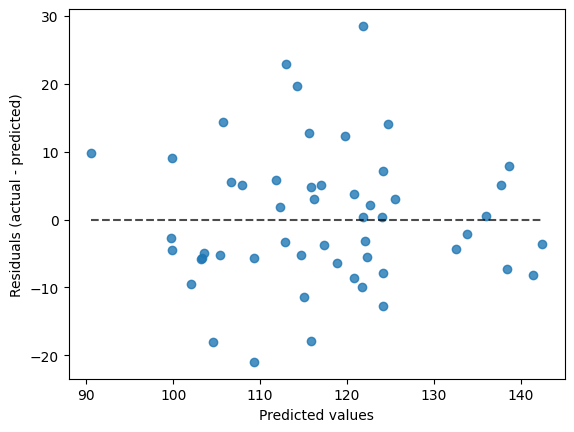

In [214]:
display = PredictionErrorDisplay(y_true=Y,y_pred=y_hat)
display.plot()
plt.show()

In [287]:
Xvifrem = sm.add_constant(Xvifrem)
model2 = sm.OLS(Y,Xvifrem).fit()
model2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PRODTIME   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     11.55
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           2.95e-07
Time:                        15:04:00   Log-Likelihood:                -194.78
No. Observations:                  52   AIC:                             401.6
Df Residuals:                      46   BIC:                             413.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            61.4114      9.207      6.670      0.000      42.879      79.944
CHANGE           -0.0392      0.016     -2.403      0.020      -0.072      -0.006
CHECKS            0.0522      0.011      4.845      0.000       0.031       0.074
BUS               0.0065      0.005      1.268      0.211      -0.004       0.017
misc+mail         0.1180      0.037      3.199      0.002       0.044       0.192
WINDOWS+MONEY     0.0017      0.001      2.027      0.048    1.17e-05       0.003
==============================================================================
Omnibus:                        4.287   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                3.499
Skew:                           0.627   Prob(JB):                        0.174
Kurtosis:                       3.209   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

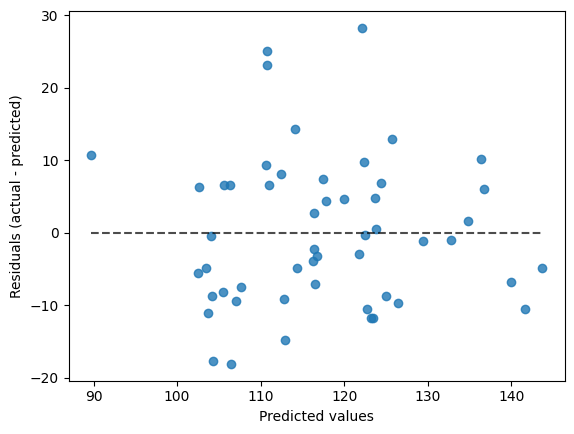

In [285]:
resmodel2 = LinearRegression()
resmodel2.fit(Xvifrem,Y)
y_hat2 = resmodel2.predict(Xvifrem)
display2 = PredictionErrorDisplay(y_true=Y,y_pred = y_hat2)


display2.plot()